# Investigate Difference in Mean Time in Hospital Between Diabetic Men and Women

### Introduction

This project will use the "Diabetes 130-US hospitals for years 1999-2008 Data Set," sourced from the UCI Machine Learning Repository database to answer the inferential question of whether there is a difference in mean time in hospital stay between sex hospitalized diabetic patients in the United States. This data set represents 10 years (1999-2008) of clinical data at 130 US hospitals extracted from the database of encounters and includes over 50 features representing patient and hospital outcomes (Strack et al., 2014). Determining a difference in the mean length of time of in hospital (measured in days) between the sexes, will help identify whether more consideration is needed in managing diabetes care in hospital for a particular sex.

Diabetes Mellitus is defined as a syndrome of hyperglycemia (high blood sugar levels) that can be classified into type 1 and type 2 (Bennet, 2020). The chronic and complex nature of diabetes can increase the need for these patients to be admitted into hospital for further treatment and monitoring leading to increases in costs for the healthcare system (Choi et al., 2021).

The length-of-stay (LOS) at a hospital is an important quantitative measure of patient outcomes and quality of care (Thomas, 1997). A study by Lingsma et al., discovered that at the patient level, patients in the upper quartile of LOS had an increased odds of mortality than those who were lower (Lingsma et al., 2018). Patients with diabetes were more likely than those without diabetes to have more hospital days (Comino et al., 2015). 

## Preliminary Data

In [1]:
library(tidyverse)
library(infer)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Read dataset from the web into R
# Cleaned the dataset and selected variables of interest
diabetes_data <- read_csv("https://raw.githubusercontent.com/Yanjun0526/STAT201Project/main/diabetic_data.csv") |>
    filter(gender != "Unknown/Invalid") |> 
    select(gender, time_in_hospital)
head(diabetes_data)

Rows: 101766 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (37): race, gender, age, weight, payer_code, medical_specialty, diag_1, ...
dbl (13): encounter_id, patient_nbr, admission_type_id, discharge_dispositio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,time_in_hospital
<chr>,<dbl>
Female,1
Female,3
Female,2
Male,2
Male,1
Male,3


**TABLE 1:** *Diabetes Data limited to "Gender", and "Time in Hospital"*

In [3]:
# Number of two categories
diabetes_data |>
    select(gender, time_in_hospital) |>
    group_by(gender) |> 
    tally()

gender,n
<chr>,<int>
Female,54708
Male,47055


**TABLE 2:** *Tally of Data Points by "Gender"*

In [4]:
# Mean time in hospital of two categories
diabetes_data |>
    group_by(gender) |> 
    summarize(mean_time_in_hospital = mean(time_in_hospital))

gender,mean_time_in_hospital
<chr>,<dbl>
Female,4.478797
Male,4.299777


**TABLE 3:** *Mean Time in Hospital grouped by "Gender"*

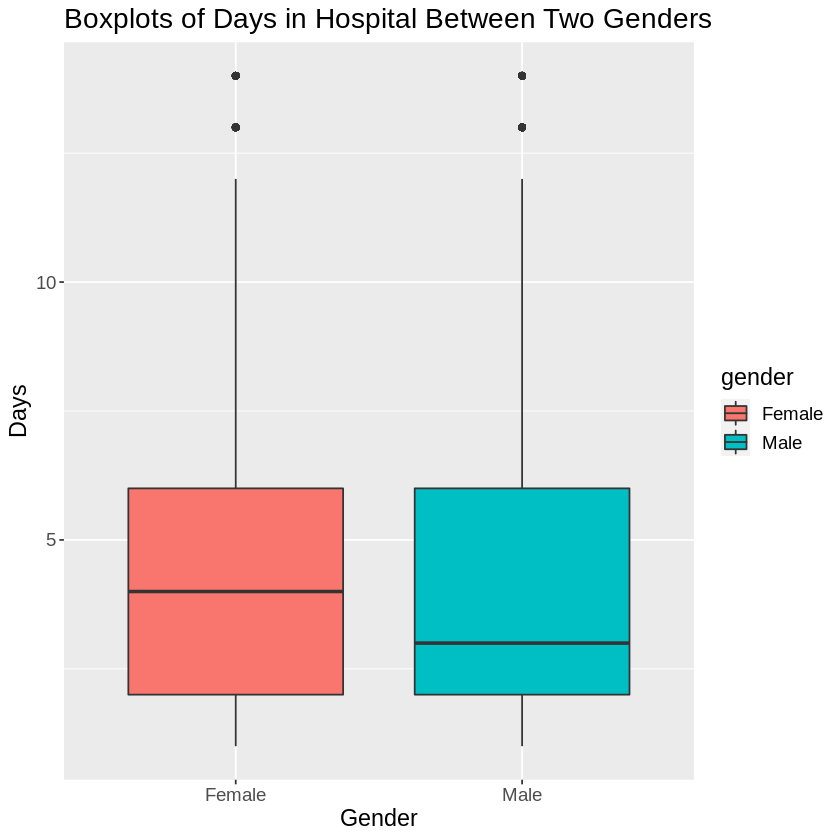

In [5]:
# Boxplots of days in hospital between two categories
boxplots <- 
    diabetes_data %>%  
    ggplot(aes(x = gender, y = time_in_hospital, fill = gender)) + 
    geom_boxplot() + 
    ylab("Days") +
    xlab("Gender") +
    ggtitle("Boxplots of Days in Hospital Between Two Genders") +
    theme(text = element_text(size=14)) 

boxplots

**GRAPH 1:** *Boxplot of Distribution of Days in Hospital grouped by "Gender"*

## Data

### Simulation-based Bootstrapping Hypothesis Test Method

In [6]:
set.seed(1)

# Calculate the observed difference in means in our sample
obs_diff_in_means <- diabetes_data |> 
    specify(formula = time_in_hospital ~ gender) |> 
    calculate(stat = "diff in means", order = c("Female", "Male"))

obs_diff_in_means

stat
<dbl>
0.1790197


**TABLE 4:** *Calculated Observed Difference in Means*

   The calculated observed difference of means in days hopitalized,  calculated from the data, grouped by sex is 0.1790197 days. 

In [7]:
set.seed(2)

# The simulated null model for the difference in means
null_diff_in_means <- 
    diabetes_data %>% 
    specify(formula = time_in_hospital ~ gender) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 200, type = "permute")  |>
    calculate(stat = "diff in means", order = c("Female", "Male"))

head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.029080139
2,-0.002860577
3,0.016983778
4,0.016707064
5,0.022518061
6,-0.004520862


**TABLE 5:** *The data of simulated null model for the difference in means*

**Hypothesis:
$H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$ ($\mu_0$ = mean length of stay for men, $\mu$ = mean length of stay for women)**

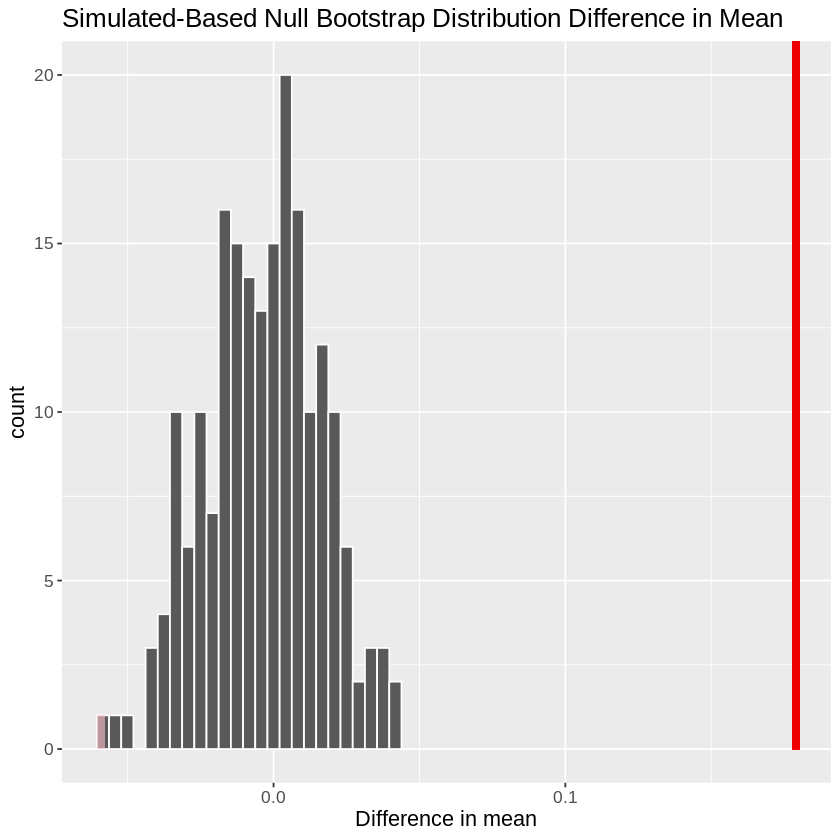

In [8]:
# Produce visualization of null bootstrap distribution
# We specify and calculate the difference in mean test statistic for our bootstrap model using 200 replicates.
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 25) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in mean") +
    theme(text = element_text(size = 13)) +
    ggtitle("Simulated-Based Null Bootstrap Distribution Difference in Mean")
diff_in_means_plot

**GRAPH 2:** *Simulated-Based Null Bootstrap Distribution Difference in Mean* 

Graph 2 visually demonstrates that our observed difference in means is far outside the range of our generated null distribution. This means that the observed difference is irregular according to the data and the null distribution.

In [17]:
# Calculate p-value from null model
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")
p_value

ERROR: Error in get_p_value(., obs_stat = obs_diff_in_means, direction = "both"): object 'null_diff_in_means' not found


The p-value of zero is due to the simulation-based nature of the infer package according to the function documentation of get_p_value. The get_p_value output is an approximation based on the number of reps chosen in the generate() step. This indicates that observed statistic is very unlikely given the null hypothesis, and only a small number of reps have been generated to form a null distribution. 

In [12]:
# Generate bootstrap distribution of difference in means with 200 replicants
diff_in_means_bootstrap_dist <- 
    diabetes_data %>%
    specify(formula = time_in_hospital ~ gender) %>%
    generate(reps = 200, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Female", "Male"))

# Generate 95% confidence interval
diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1433116,0.2119367


**TABLE 6:** *The 95% confidence interval calculated from our difference in mean bootstrap distribution*

The confidence calculated from our difference in mean bootstrap distribution(Table 5) using a confidence level of 95% appears to exclude the null hypothesis value of zero. Because the confidence interval does not capture the null hypothesis value we conclude that the observed difference in mean is statistically significant.

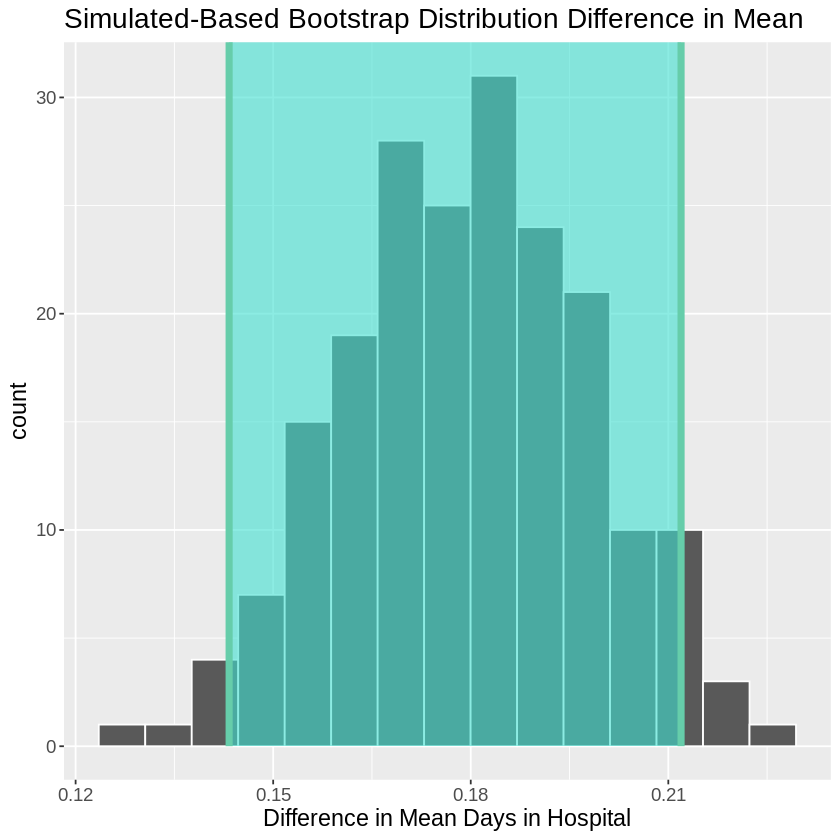

In [13]:
# Produce visualization for bootstrap distribution
diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 14)) + 
    xlab("Difference in Mean Days in Hospital") +
    ggtitle("Simulated-Based Bootstrap Distribution Difference in Mean")
diff_in_means_ci_plot

**Graph 3:** A visualization of the confidence interval around generated bootstrap distribution.

### Theory Based Hypothesis Test

In [14]:
p_value_diff_means <- tidy(
                   t.test(x = diabetes_data %>% filter(gender == "Female") %>% pull(time_in_hospital), 
                          y = diabetes_data %>% filter(gender == "Male") %>% pull(time_in_hospital),
                          alternative = "two.sided",
                         conf.level = 0.95)
               )
p_value_diff_means

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1790197,4.478797,4.299777,9.540878,1.446741e-21,99425,0.1422436,0.2157958,Welch Two Sample t-test,two.sided


**TABLE 7:** *Tidy table of the result produced by t.test() function*

The p-value of alpha = 0.05, 95% confidence interval, and test statistic for difference in means is calculated using the t.test function. The confidence interval achieved by this method agrees with that generated from our bootstrap simulation. The very small p-value of 1.446741e-21 is calculated in this function, unlike the result of 0 produced using the get_p_value function of the infer model. Considering the p-value is below our alpha value of 0.05 and the confidence interval does not capture the null hypothesis value we can say with 95% confidence reject the null hypothesis.

### Methods: Plan

The objective of this report aims to investigate the difference in the duration of stay between the sexes of hospitalized diabetic patients. The sample size of the data is large enough, with more than 100,000 individuals.
**Hypothesis:
$H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$ ($\mu_0$ = mean length of stay of men, $\mu$ = mean length of stay of women)**

We will utilize point estimate and interval estimation to determine the population mean length of stay between males and females, implementing hypothesis testing via simulation/randomization, and Theory based hypothesis testing to validate the result from the simulation test.

Reasoning why plots and estimates are not enough: \
We cannot determine the statistical significance of the differences in the mean time in hospital between diabetic men and women by visual inspection of the plot or by calculating only the mean and standard deviation of the data.

What do we expect to find? \
We expect to determine the mean and standard deviation of the length of time spent in hospitals between diabetic men and women. We will also test the null hypothesis that both genders have equal hospitalization time for diabetes treatment.

What impact could such findings have? \
The identification of sex disparities in hospital stay duration can enable targeted treatment strategies and inform healthcare policy choices regarding diabetes care.

What future questions could this lead to? \
Further research could also investigate the impact of reducing sex disparities in diabetes care on patient outcomes and healthcare expenditures.


### References

Bennett, J. (2020). ClinicalKey. Clinicalkey.com. https://www.clinicalkey.com/#

Choi, J., Booth, G., Jung, H. Y., Lapointe-Shaw, L., Tang, T., Kwan, J. L., Rawal, S., Weinerman, A., Verma, A., &amp; Razak, F. (2021, April 1). Association of diabetes with frequency and cost of hospital admissions: A retrospective cohort study. CMAJ Open. Retrieved March 17, 2023, from https://www.cmajopen.ca/content/9/2/E406 

Comino, E. J., Harris, M. F., Islam, M. D. F., Tran, D. T., Jalaludin, B., Jorm, L., Flack, J., &amp; Haas, M. (2015, January 22). Impact of diabetes on hospital admission and length of stay among a general population aged 45 year or more: A record linkage study. BMC health services research. Retrieved March 17, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4310177/ 

Lingsma, H. F., Bottle, A., Middleton, S., Kievit, J., Steyerberg, E. W., &amp; Marang-van de Mheen, P. J. (2018, February 14). Evaluation of hospital outcomes: The relation between length-of-stay, readmission, and mortality in a large international administrative database - BMC Health Services Research. BioMed Central. Retrieved March 17, 2023, from https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-018-2916-1 

Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., &amp; Clore, J. N. (2014). Impact of hba1c measurement on hospital readmission rates: Analysis of 70,000 clinical database patient records. BioMed Research International, 2014, 1–11. https://doi.org/10.1155/2014/781670 

Thomas, J. W., Guire, K. E., & Horvat, G. G. (1997). Is patient length of stay related to quality of care?. Hospital & health services administration, 42(4), 489–507. 

